# Bank Marketing Campaign - Model Building

## Group name: Data Science Enthusiasts

### Team member's details:
#### Member 1:¶
Name : Amira Asta

Email : amira.asta02@gmail.com

Country : Tunisia

College/Company : Afrikanda

Specialization : Data Science

#### Member 2:
Name : Vatsal Vinesh Mandalia

Email : vatsalvm10@outlook.com

Country : Oman

College/Company : Graduated

Specialization : Data Science

### Import necessary libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import data modelling libraries
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

In [121]:
bank = pd.read_csv(r'C:\Users\Amira\Documents\PERSONAL\Data_Glacier_online_internship\Final_Project\Data\bank-additional\bank-additional\bank-additional-full.csv', delimiter=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [25]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Duplicated Rows

In [122]:
duplicated_rows = bank[bank.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 12


In [123]:
# drop duplicated rows

bank.drop_duplicates(inplace = True)
bank.shape

(41176, 21)

### Drop 'Duration' feature
This attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [124]:
bank = bank.drop(['duration'],axis=1)
print(bank.shape)
bank.head(3)

(41176, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Correlation
As we've seen before highly correlated features may describe clients state from different social-economic angles. Their variance might support model capacity for generalization.

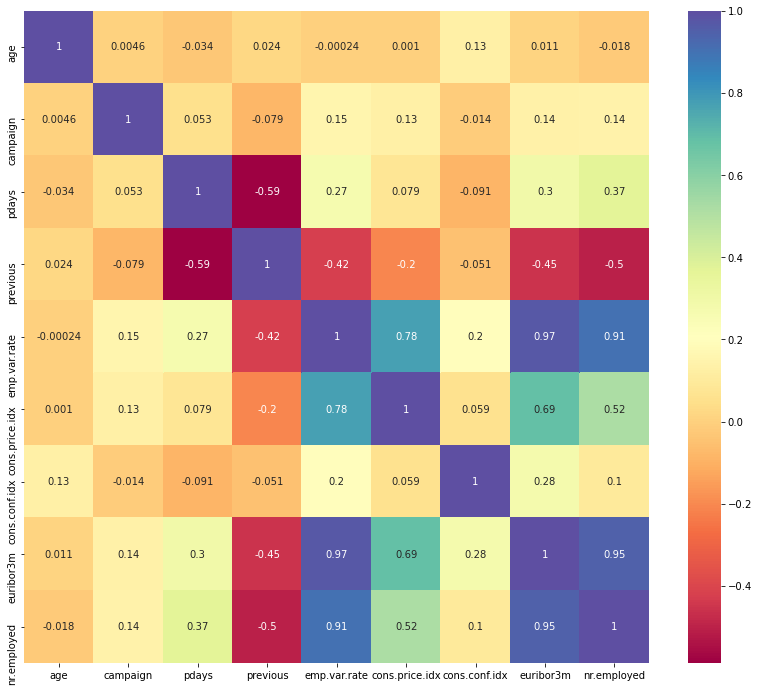

In [128]:
plt.figure(figsize=(14, 12))
sns.heatmap(bank.corr(), annot=True, cmap='Spectral')
plt.show()

### Handle highly correlated variables

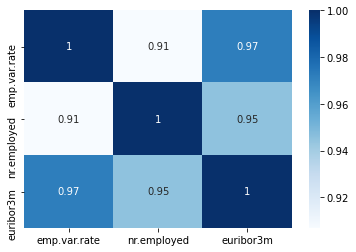

In [129]:
sns.heatmap(bank[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Blues')
plt.show()

### Observations
Positive high correlation between:

'emp.var.rate' and 'nr.employed'

'emp.var.rate' and 'euribor3m'

'euribor3m' and 'nr.employed'

Euribor is the Euro Interbank Offered Rate. This is the interest rate at which credit institutions lend money to each other.

With this feature we can say that 'emp.var.rate' (employment variation rate ) and 'nr.employed' (number of employees) are positively correlated with euribor. So we will drop 'emp.var.rate' and 'nr.employed' as 'euribor' also give us the price of money in current market.

In [130]:
bank.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

In [131]:
print(bank.shape)
bank.head(3)

(41176, 18)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


### Handling Outliers
Outliers cause significant impact on the Mean and Variance.It becomes necessary to treat the outliers. We can notice outliers mainly in the following 2 features:

In [133]:
# bank[["age", "campaign"]].describe()

"age" and "campaign" are skewed towards right, we will compute the Interquartile Range (IQR) based method and replace the outliers with the lower and upper boundaries.

In [132]:
# # compute interquantile range to calculate the boundaries

# lower_boundries= []
# upper_boundries= []
# for i in ["age", "campaign"]:
#     IQR= bank[i].quantile(0.75) - bank[i].quantile(0.25)
#     lower_bound= bank[i].quantile(0.25) - (1.5*IQR)
#     upper_bound= bank[i].quantile(0.75) + (1.5*IQR)
    
#     print(i, ":", lower_bound, ",",  upper_bound)
    
#     lower_boundries.append(lower_bound)
#     upper_boundries.append(upper_bound)

In [134]:
# lower_boundries, upper_boundries

In [135]:
# replace the all the outliers which is greater then upper boundary by upper boundary

# j = 0
# for i in ["age", "campaign"]:
#     df6.loc[df6[i] > upper_boundries[j], i] = int(upper_boundries[j])
#     j = j + 1

For age the lower boundary (9.5) < minimum value (17)
For duration the lower boundary is negative (-2.0), so replacing the outlier with the lower boundary is not required

In [136]:
# Now, we don't have more outliers

# bank[["age", "campaign"]].describe()

### Encoding Categorical Features
Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [137]:
target = 'y'
features = [c for c in bank.columns if c != target]
len(features)

17

In [138]:
cat_cols = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'poutcome']
num_cols = [c for c in features if c not in cat_cols]

In [139]:
num_cols

['age',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

In [140]:
# check categorical class

for i in cat_cols:
    print(i, ":", bank[i].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital : ['married' 'single' 'divorced' 'unknown']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown' 'yes']
housing : ['no' 'yes' 'unknown']
loan : ['no' 'yes' 'unknown']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']


In [142]:
# initializing label encoder

le = LabelEncoder()

# iterating through each categorical feature and label encoding them

for feature in cat_cols:
    bank[feature] = le.fit_transform(bank[feature])

In [143]:
# label encoded dataset

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,no
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,no


In [144]:
#mapping the values of our target variable into binary yes->1 and no->0

def target_variable_binary(y):
    y = y.replace({"yes":1,"no":0},inplace=True)

In [145]:
target_variable_binary(bank['y'])

In [146]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


In [147]:
# now, all our dataset is numerical

bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int32  
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  y               41176 non-null 

### Correlation among feature variables
Now that our dataset contains all numerical variables, we could check correlation between all the features 

<AxesSubplot:>

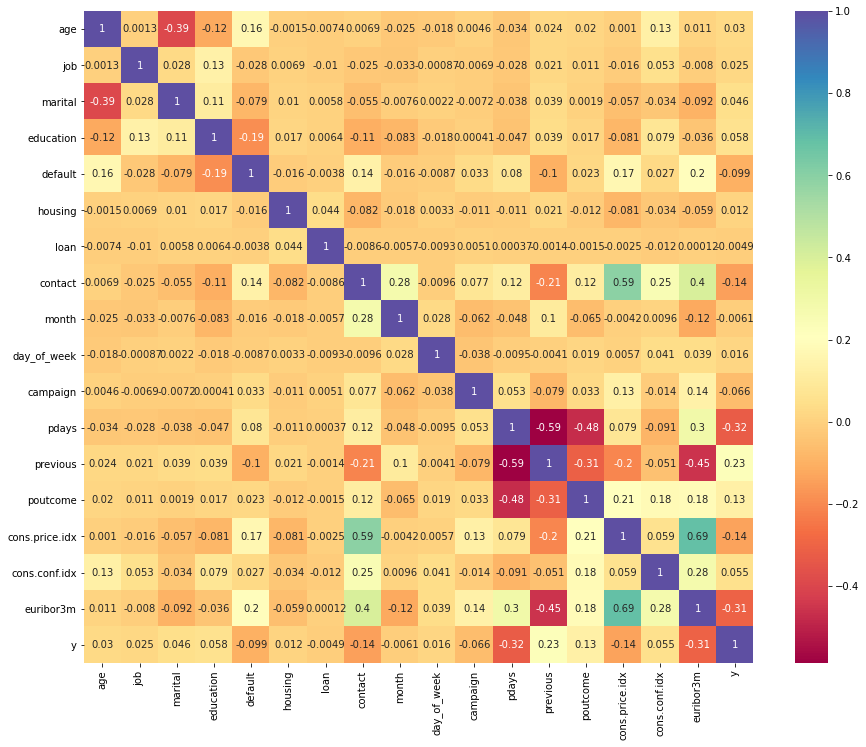

In [148]:
plt.figure(figsize=(15,12))
sns.heatmap(bank.corr(), annot=True, cmap='Spectral')

There are no features that are highly correlated and inversely correlated. 

If we had, we could have written the condition that if the correlation is higher than 0.8 (or can be any threshold value depending on the domain knowledge) and less than -0.8, we could have dropped those features.

In [149]:
#Feature correlation importance

bank.corr()['y'].sort_values(ascending = False)

y                 1.000000
previous          0.230202
poutcome          0.129810
education         0.057776
cons.conf.idx     0.054802
marital           0.046249
age               0.030381
job               0.025248
day_of_week       0.015970
housing           0.011613
loan             -0.004922
month            -0.006051
campaign         -0.066361
default          -0.099364
cons.price.idx   -0.136134
contact          -0.144774
euribor3m        -0.307740
pdays            -0.324948
Name: y, dtype: float64

### Save final dataframe to csv

In [150]:
data = bank.to_csv(r'C:\Users\Amira\Documents\PERSONAL\Data_Glacier_online_internship\Final_Project\Data\final_dataset.csv', index = None, header=True)

### Model Building

In [151]:
df = pd.read_csv(r'C:\Users\Amira\Documents\PERSONAL\Data_Glacier_online_internship\Final_Project\Data\final_dataset.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,93.994,-36.4,4.857,0


In [152]:
df.shape

(41176, 18)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  int64  
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  y               41176 non-null 

### Split Data Into Train and Test

In [154]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set

df_train, df_test = train_test_split(df, train_size = 0.8, random_state = 100)

In [155]:
df_train.shape, df_test.shape

((32940, 18), (8236, 18))

In [156]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y'],
      dtype='object')

In [157]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [158]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [159]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32940, 17), (32940,), (8236, 17), (8236,))

## Evaluate Algorithms: Baseline

We don't know what algorithms will do well on this dataset. Let's design our test harness. 

We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. 

We will evaluate algorithms using the ROC AUC metric. 

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model that is as good as random.

In [160]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'roc_auc'

Let's create a baseline of performance on this problem and spot-check a number of different algorithms. 

We will select a suite of different algorithms capable of working on this classification problem. The six algorithms selected include:

#### 1. Linear Algorithms: 
Logistic Regression (LR) and Linear Discriminant Analysis (LDA).

#### 2. Nonlinear Algorithms: 
Classification and Regression Trees (CART), Support Vector Machines (SVM), Gaussian Naive Bayes (NB) and k-Nearest Neighbors (KNN).

In [161]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

The algorithms all use default tuning parameters. Let's compare the algorithms.

In [162]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.761360 (0.007160)
LDA: 0.766847 (0.010284)
KNN: 0.723691 (0.012077)
CART: 0.618482 (0.006004)
NB: 0.748983 (0.008641)
SVM: 0.652477 (0.024664)


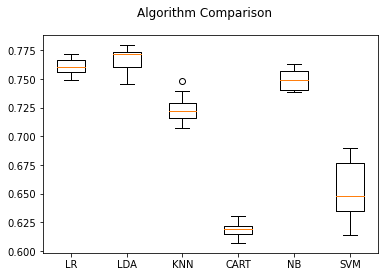

In [166]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

# save the figure
plt.savefig('model_results/plot1.jpg', dpi=200, bbox_inches='tight')
plt.show()

It is possible that the varied distribution of the attributes is having an effect on the accuracy of algorithms such as SVM. In the next section we will repeat this spot-check with a standardized copy of the training dataset.

### Evaluate Algorithms: Standardize Data

We suspect that the differing distributions of the raw data may be negatively impacting the skill of some of the algorithms.
Let's evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of one. We also need to avoid data leakage when we transform the
data. 

A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [170]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', 
                  Pipeline([('Scaler', StandardScaler()),
                            ('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.773999 (0.009747)
ScaledLDA: 0.766847 (0.010284)
ScaledKNN: 0.716266 (0.012519)
ScaledCART: 0.620697 (0.008092)
ScaledNB: 0.748995 (0.008632)
ScaledSVM: 0.697562 (0.016752)


Again, we should plot the distribution of the accuracy scores using box and whisker plots.

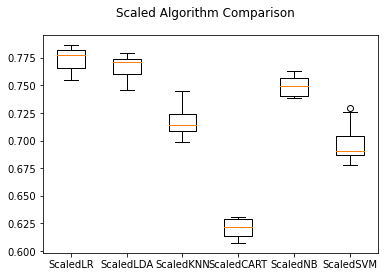

In [171]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

# save the figure
plt.savefig('model_results/plot2.jpg', dpi=200, bbox_inches='tight')
plt.show()

<!-- ### Algorithm Tuning -->
<!-- 
In this section we investigate tuning the parameters for two algorithms that show promise from
the spot-checking in the previous section: SVM. -->

<!-- ### Tuning SVM -->
<!-- We can tune two key parameters of the SVM algorithm, the value of C (how much to relax the margin) and the type of kernel. The default for SVM (the SVC class) is to use the Radial Basis Function (RBF) kernel with a C value set to 1.0. We will perform a grid search using 10-fold cross validation with a standardized copy of the training dataset. We will try a number of simpler kernel types and C values with less bias and more bias (less than and
more than 1.0 respectively). -->

We can also see that the standardization of the data has lifted the skill of SVM but still the LR model is the most accurate algorithm tested so far.

The results suggest digging deeper into LR algorithms. It is very likely that configuration beyond the default may yield even more accurate models. For this we will choose LR as our base model.

### Ensemble Methods
Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:

#### 1. Boosting Methods: 
AdaBoost (AB) and Gradient Boosting (GBM).
#### 2. Bagging Methods: 
Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation. No data standardization is used in this case because all four ensemble algorithms are based on decision trees that are less sensitive to data distributions.

In [172]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.791936 (0.009769)
GBM: 0.796797 (0.010327)
RF: 0.775682 (0.016712)
ET: 0.755040 (0.017004)


We can see that both boosting techniques provide strong accuracy scores in the high 70s (%) with default configurations. We can plot the distribution of accuracy scores across the cross validation folds.

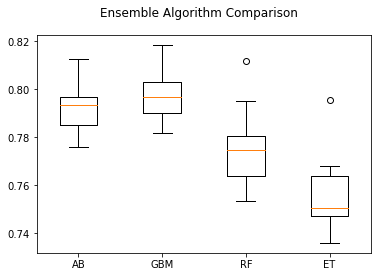

In [173]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)

# save the figure
plt.savefig('model_results/plot3.jpg', dpi=200, bbox_inches='tight')
plt.show()

The results suggest GBM may be worthy of further study, with a strong mean and a spread that skews up towards high 90s (%) in accuracy.

The default number of boosting stages to perform (n_estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid
n_estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [174]:
# Tune scaled GBM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

As before, we can summarize the best configuration and get an idea of how performance changed with each different configuration.

In [175]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.799127 using {'n_estimators': 350}
0.793466 (0.010493) with: {'n_estimators': 50}
0.796802 (0.010327) with: {'n_estimators': 100}
0.798068 (0.010646) with: {'n_estimators': 150}
0.799017 (0.010998) with: {'n_estimators': 200}
0.798886 (0.011175) with: {'n_estimators': 250}
0.799058 (0.011391) with: {'n_estimators': 300}
0.799127 (0.010840) with: {'n_estimators': 350}
0.799042 (0.010731) with: {'n_estimators': 400}


We can see that the best configuration was n estimators=350 resulting in a mean squared error of 0.799127.

### Finalize Model

In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [176]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier(random_state=seed, n_estimators=350)
model.fit(rescaledX, y_train)

GradientBoostingClassifier(n_estimators=350, random_state=7)

We can then scale the inputs for the test dataset and generate predictions.

In [177]:
from sklearn.metrics import mean_squared_error
# transform the validation dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(y_test, predictions))

0.09482758620689655


In [178]:
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_test, predictions))

0.9051724137931034


In [179]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[7206  115]
 [ 666  249]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7321
           1       0.68      0.27      0.39       915

    accuracy                           0.91      8236
   macro avg       0.80      0.63      0.67      8236
weighted avg       0.89      0.91      0.89      8236



We can see that we achieve an accuracy of nearly 90% on the held-out test dataset. A score that matches closely to our expectations estimated above during the tuning of GBM.

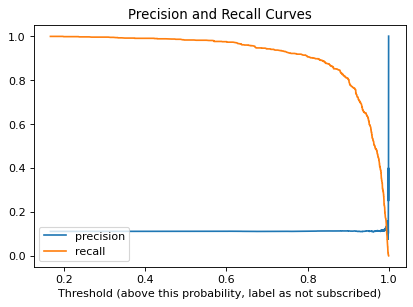

In [180]:
#precision/recall graph LG_model

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as not subscribed)');
plt.title('Precision and Recall Curves');

### Conclusion:
Final Result: From all the above models GBM performed better Scored well on training and test data. 